In [ ]:
import numpy as np
# from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
import pandas as pd
from sklearn.metrics import mean_squared_error

: 

# Fitting

In [120]:
df = pd.read_csv('./data/cleaned_pedestrian_trajs.csv')

In [152]:
user_1 = df[df['id'] == 61].drop(['id'],1)

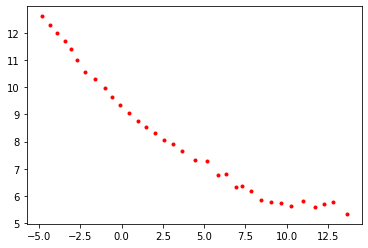

In [153]:
plt.plot(user_1.pos_x, user_1.pos_y, 'r.')

In [271]:
L = df.groupby('id').count().pos_x.values
X = df.drop(['id'],1).to_numpy()
X = np.round(X,2)

samples = np.diff(X, axis=0)

sam_len = samples.shape[0]
samples_train = samples[:int(0.8*sam_len), :]
samples_test = samples[int(0.8*sam_len):, :]

In [358]:
model = GaussianHMM(n_components=4, covariance_type="full", n_iter=10, verbose=True)
model.fit(samples_train)

         1       -5959.0073             +nan
         2        1335.1213       +7294.1286
         3        1337.0199          +1.8986
         4        1337.6689          +0.6490
         5        1338.0409          +0.3720
         6        1338.3203          +0.2794
         7        1338.5718          +0.2515
         8        1338.8252          +0.2534
         9        1339.1001          +0.2749
        10        1339.4187          +0.3186


GaussianHMM(covariance_type='full', n_components=4, verbose=True)

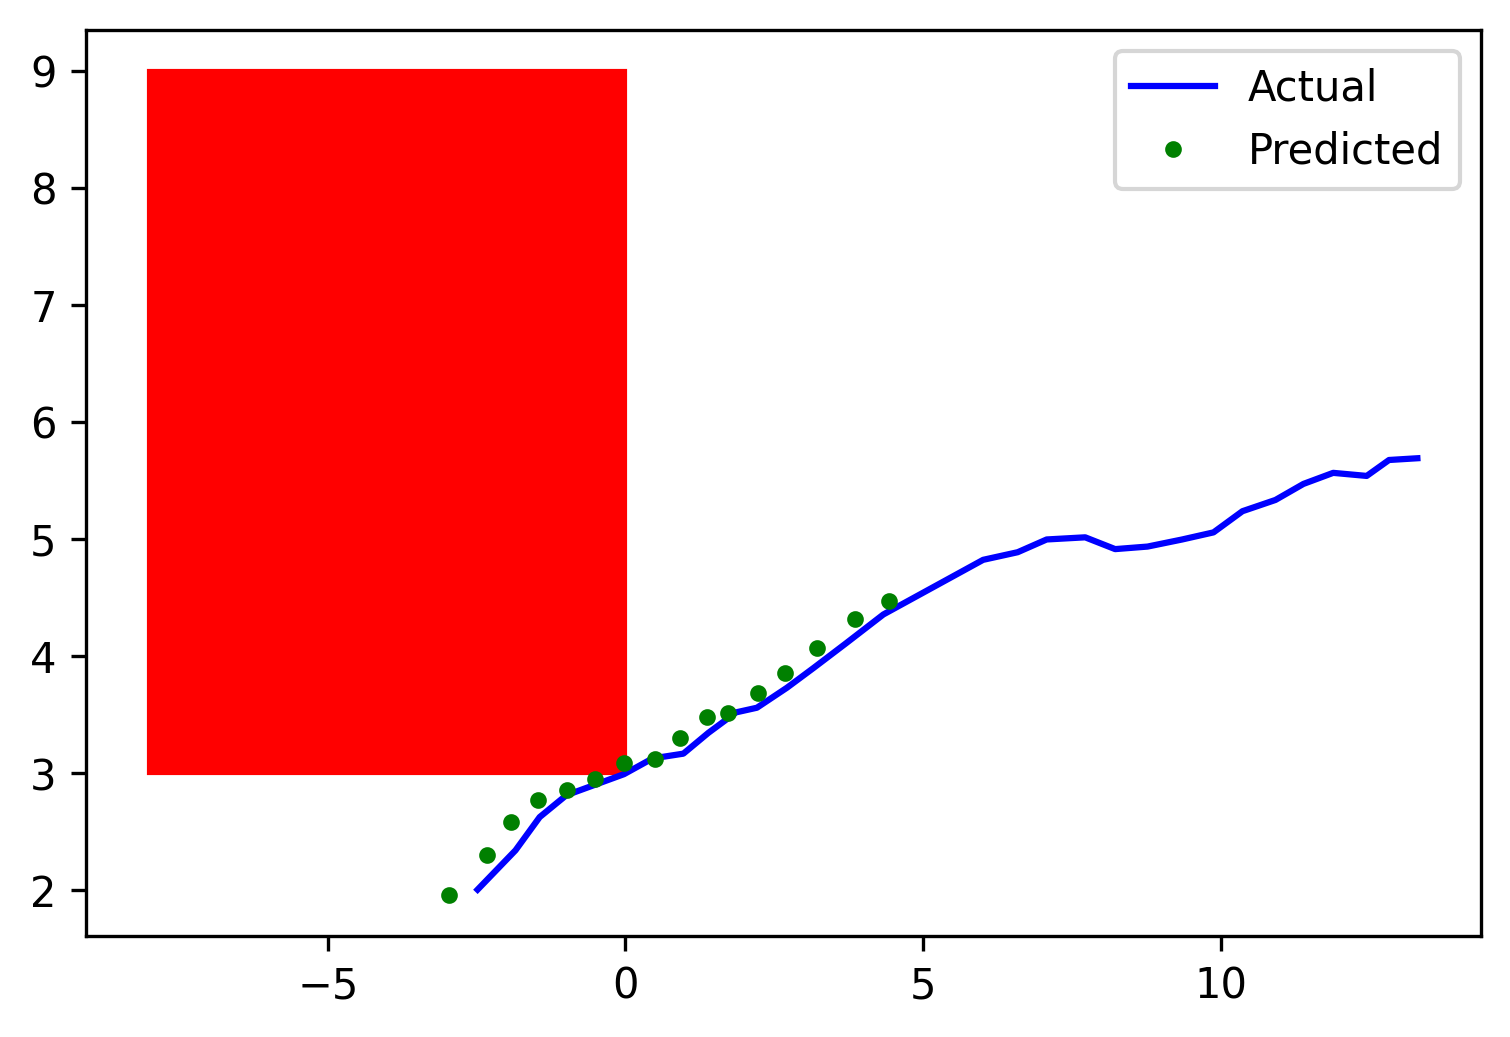

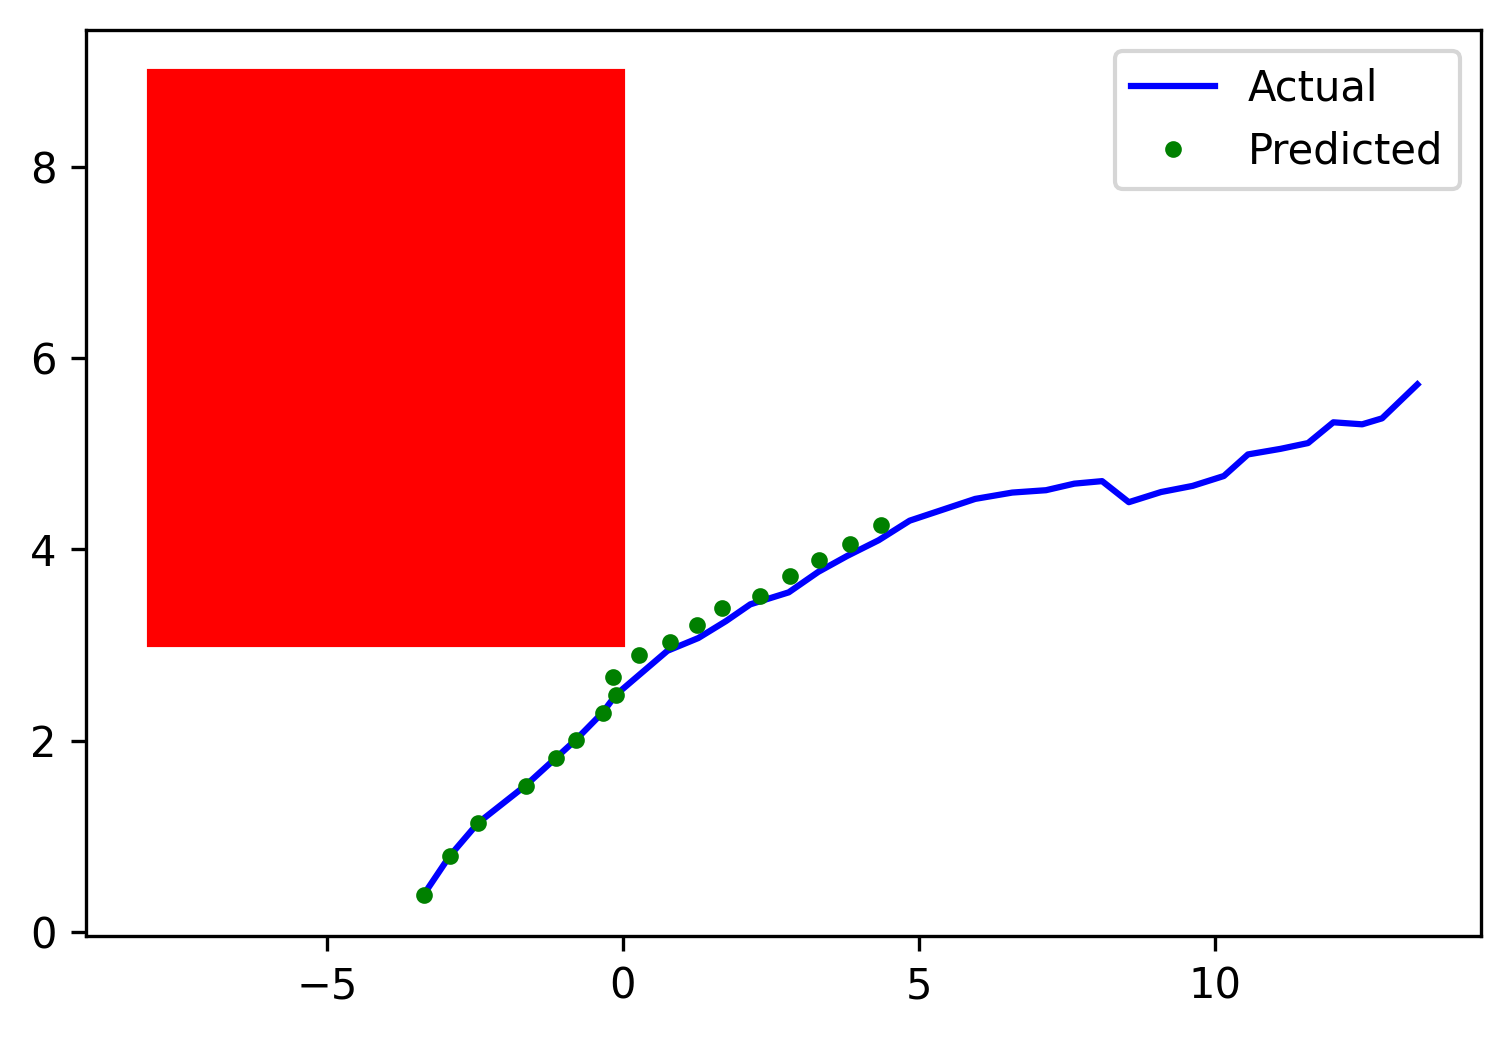

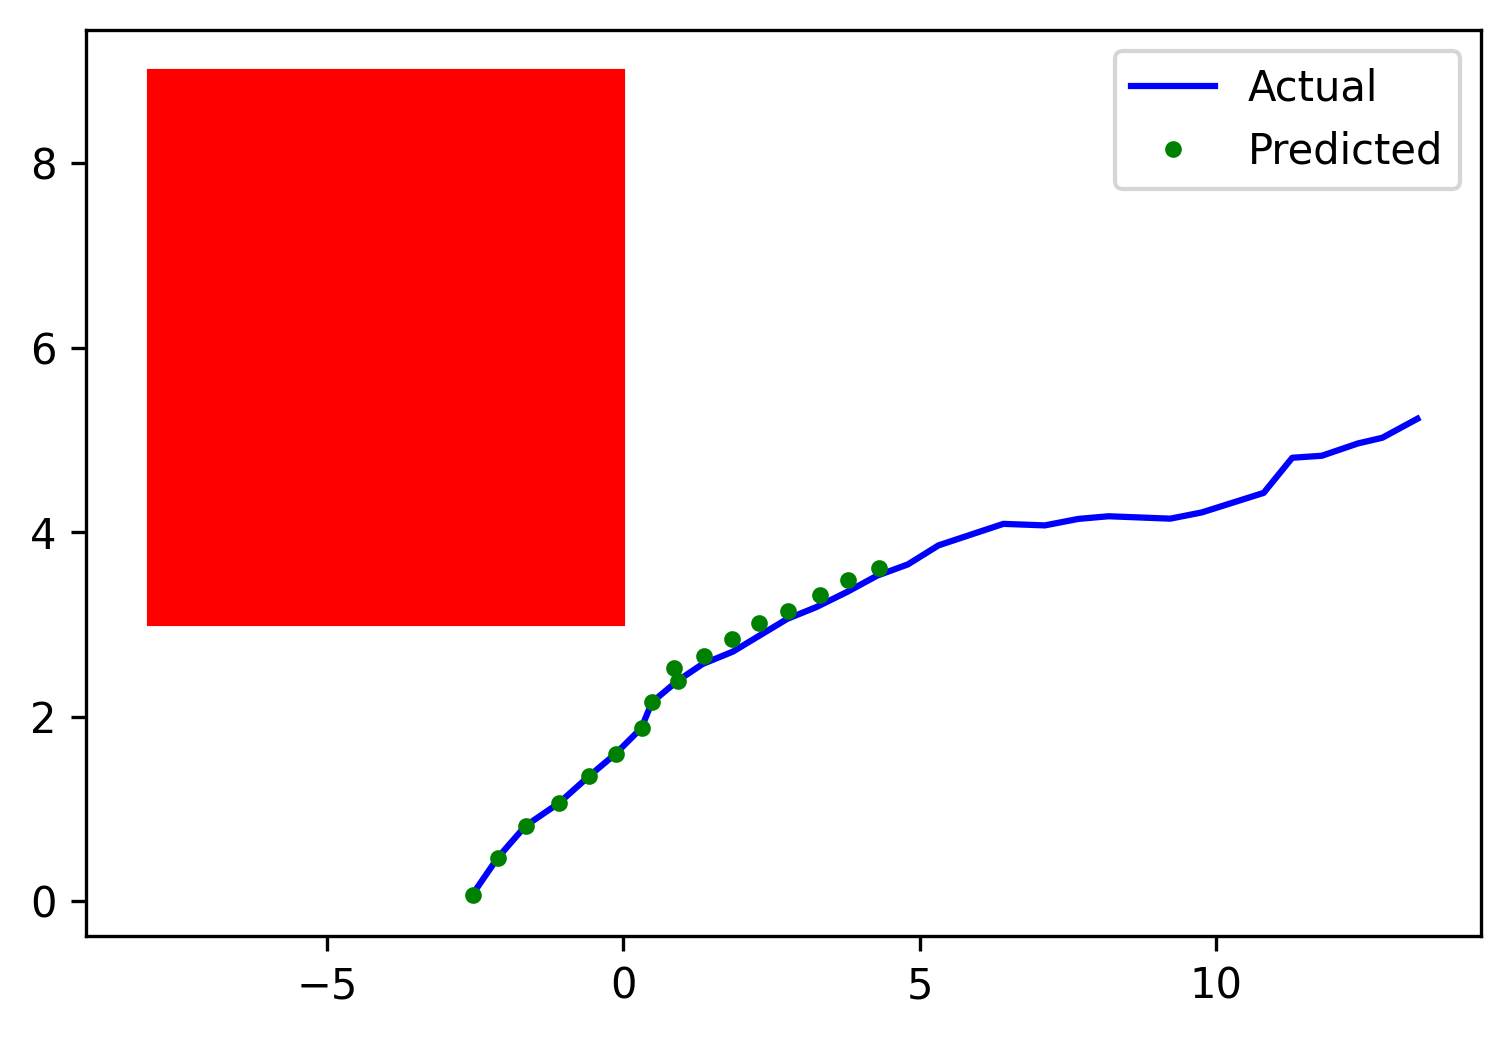

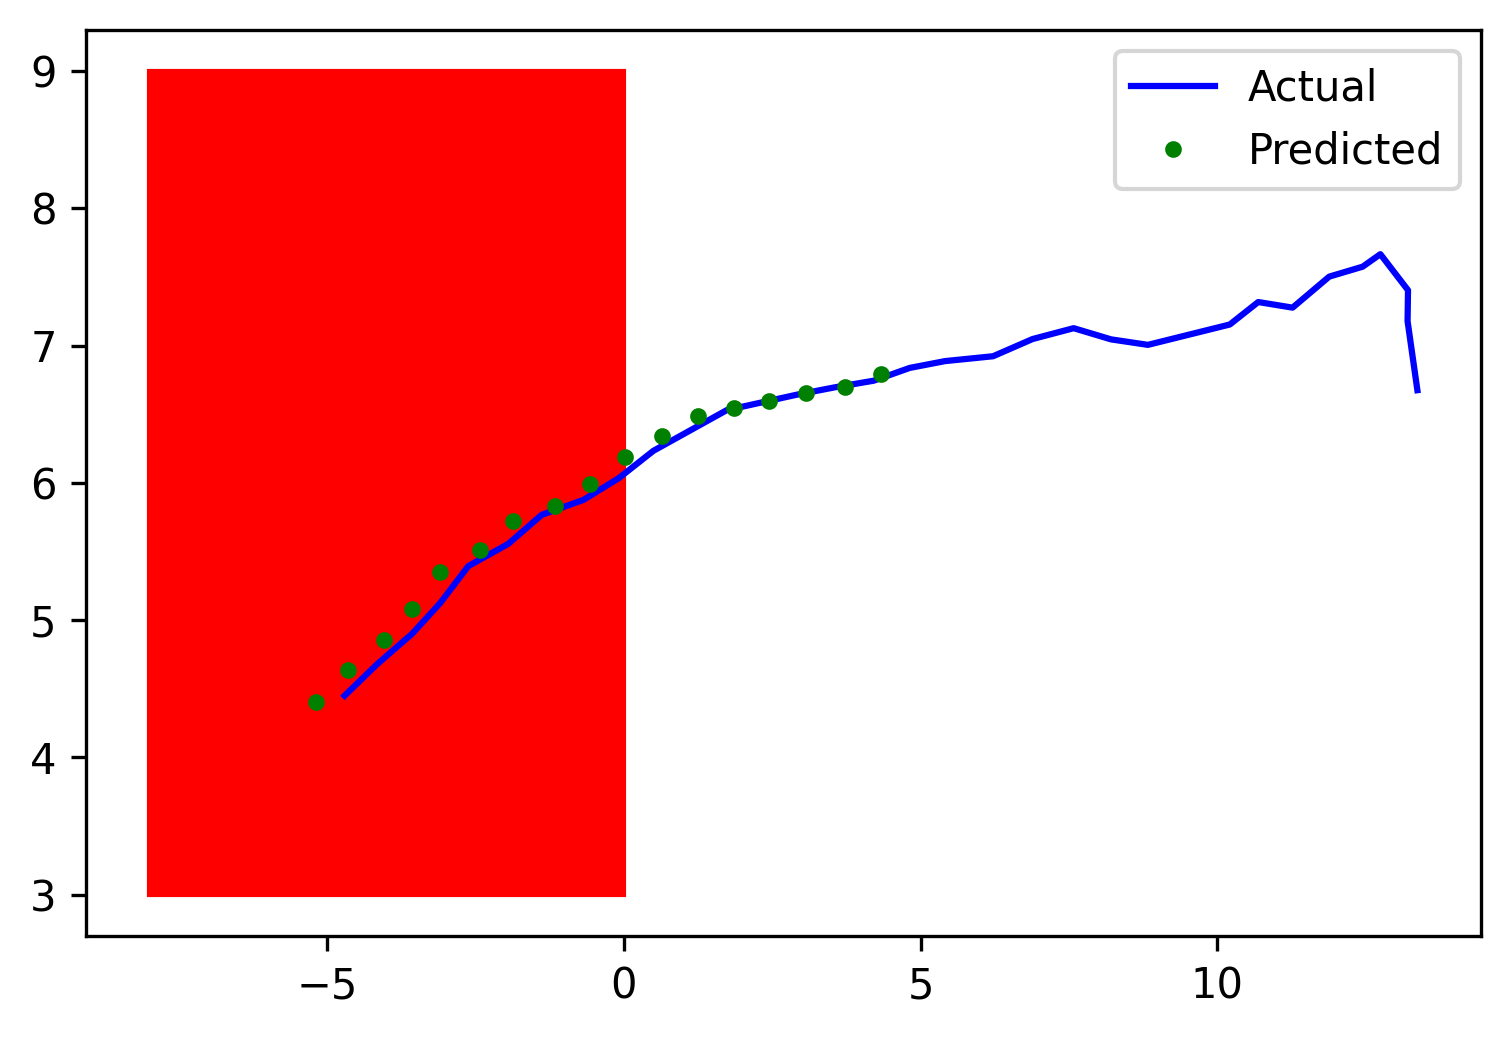

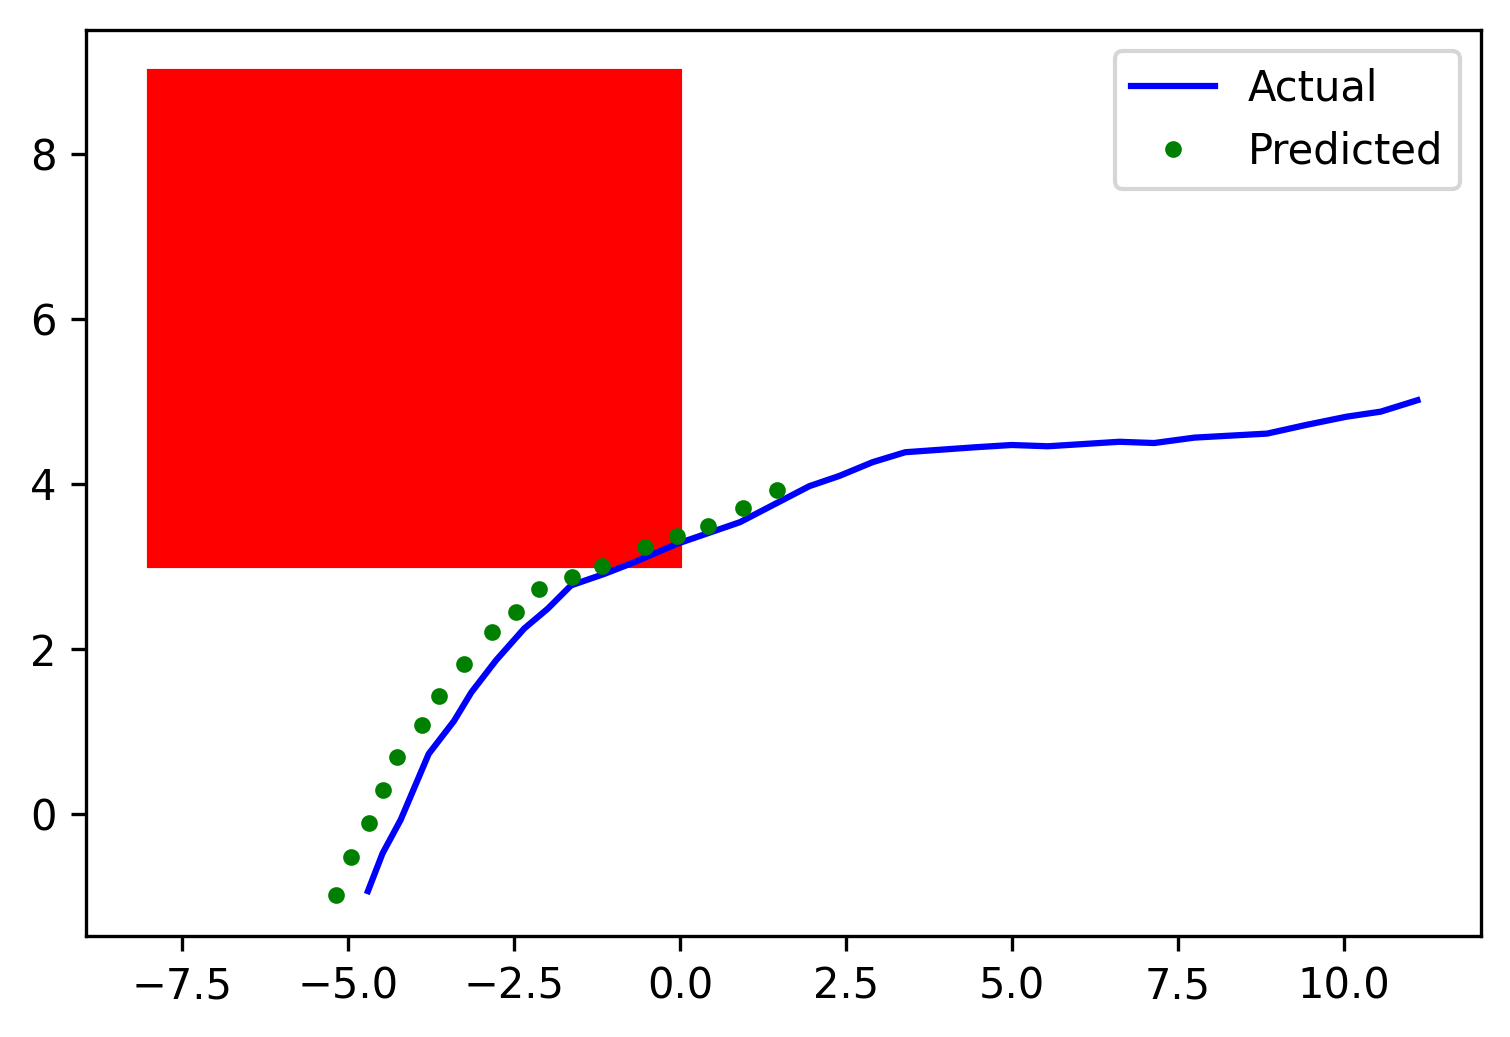

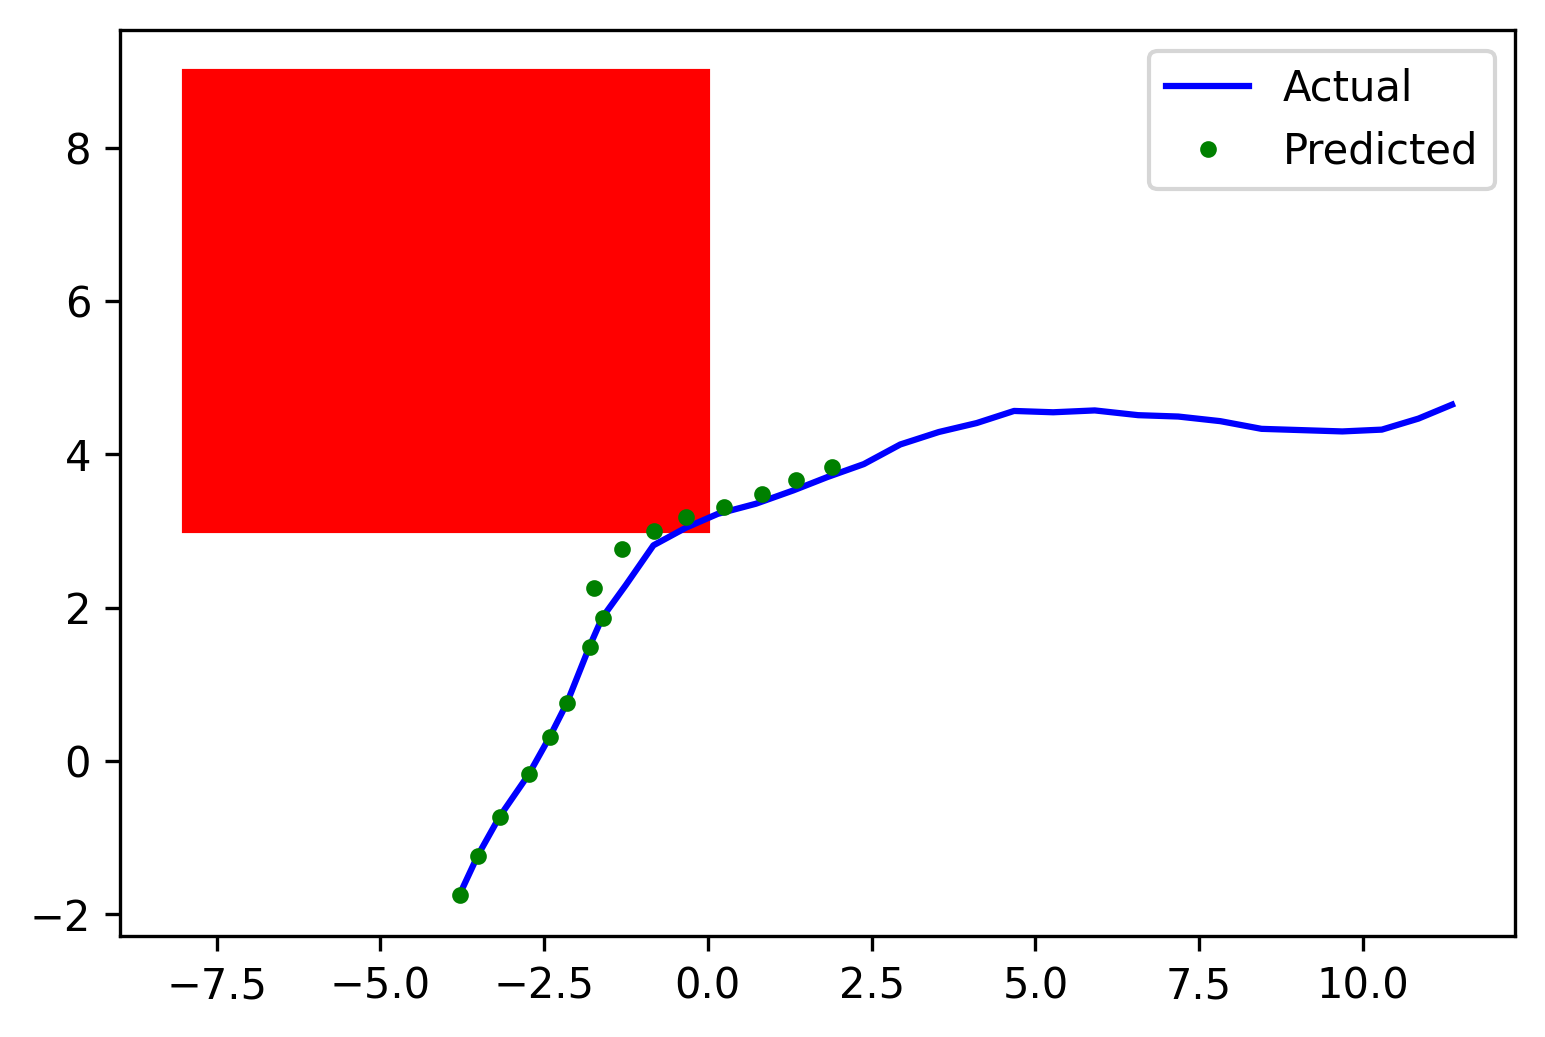

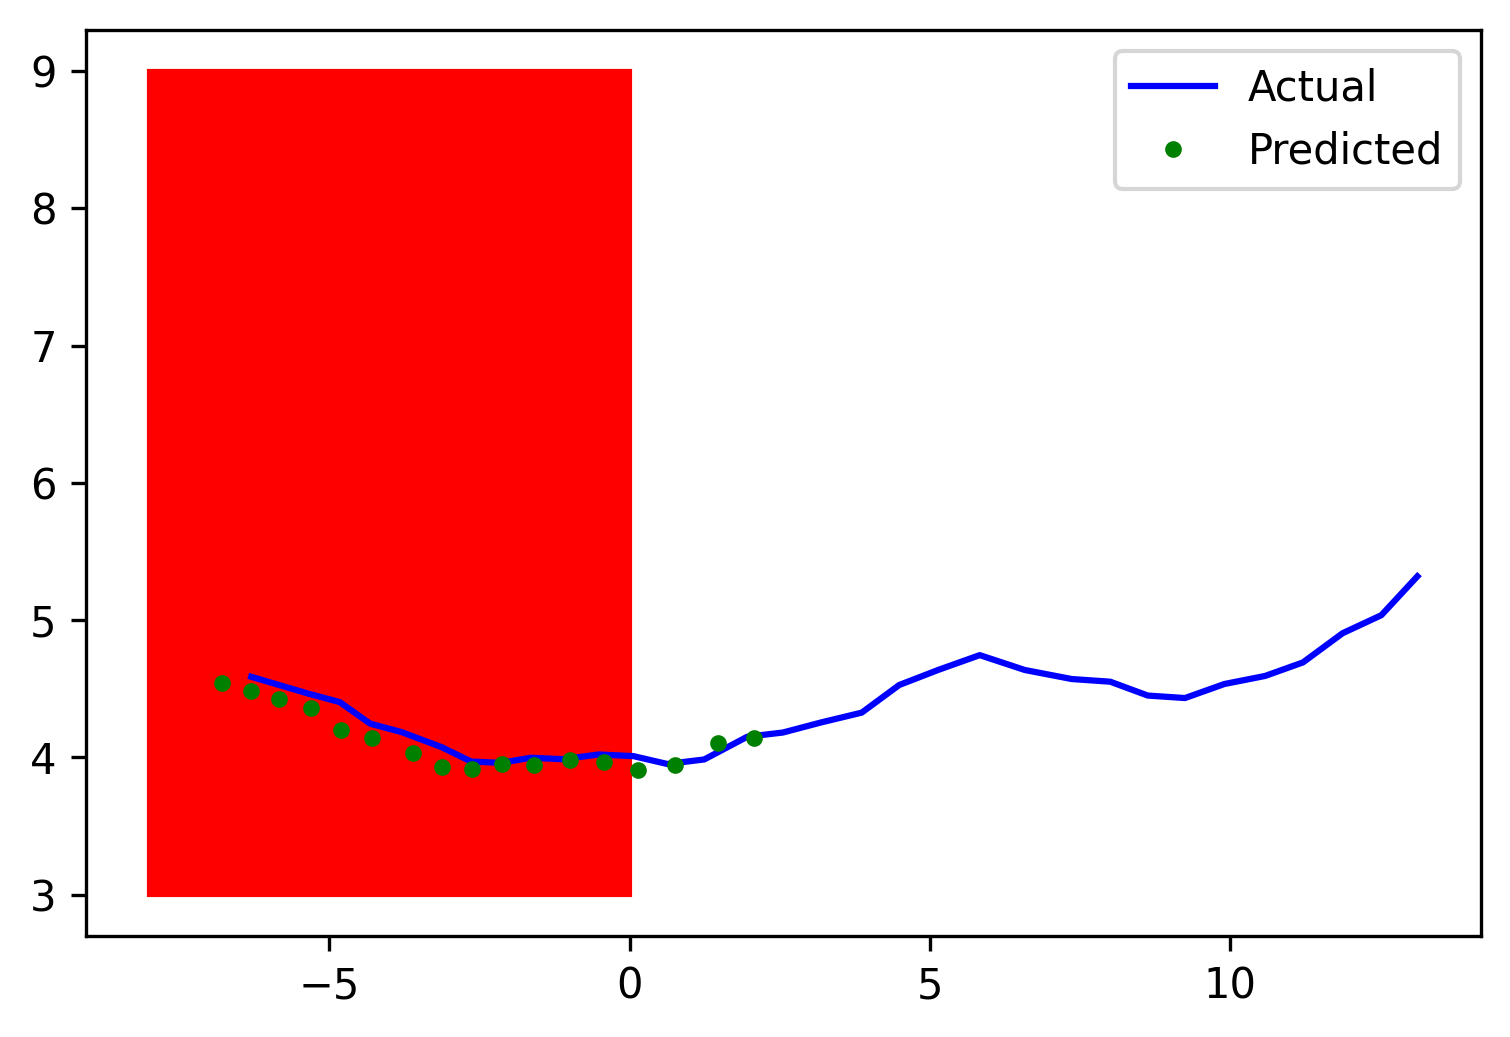

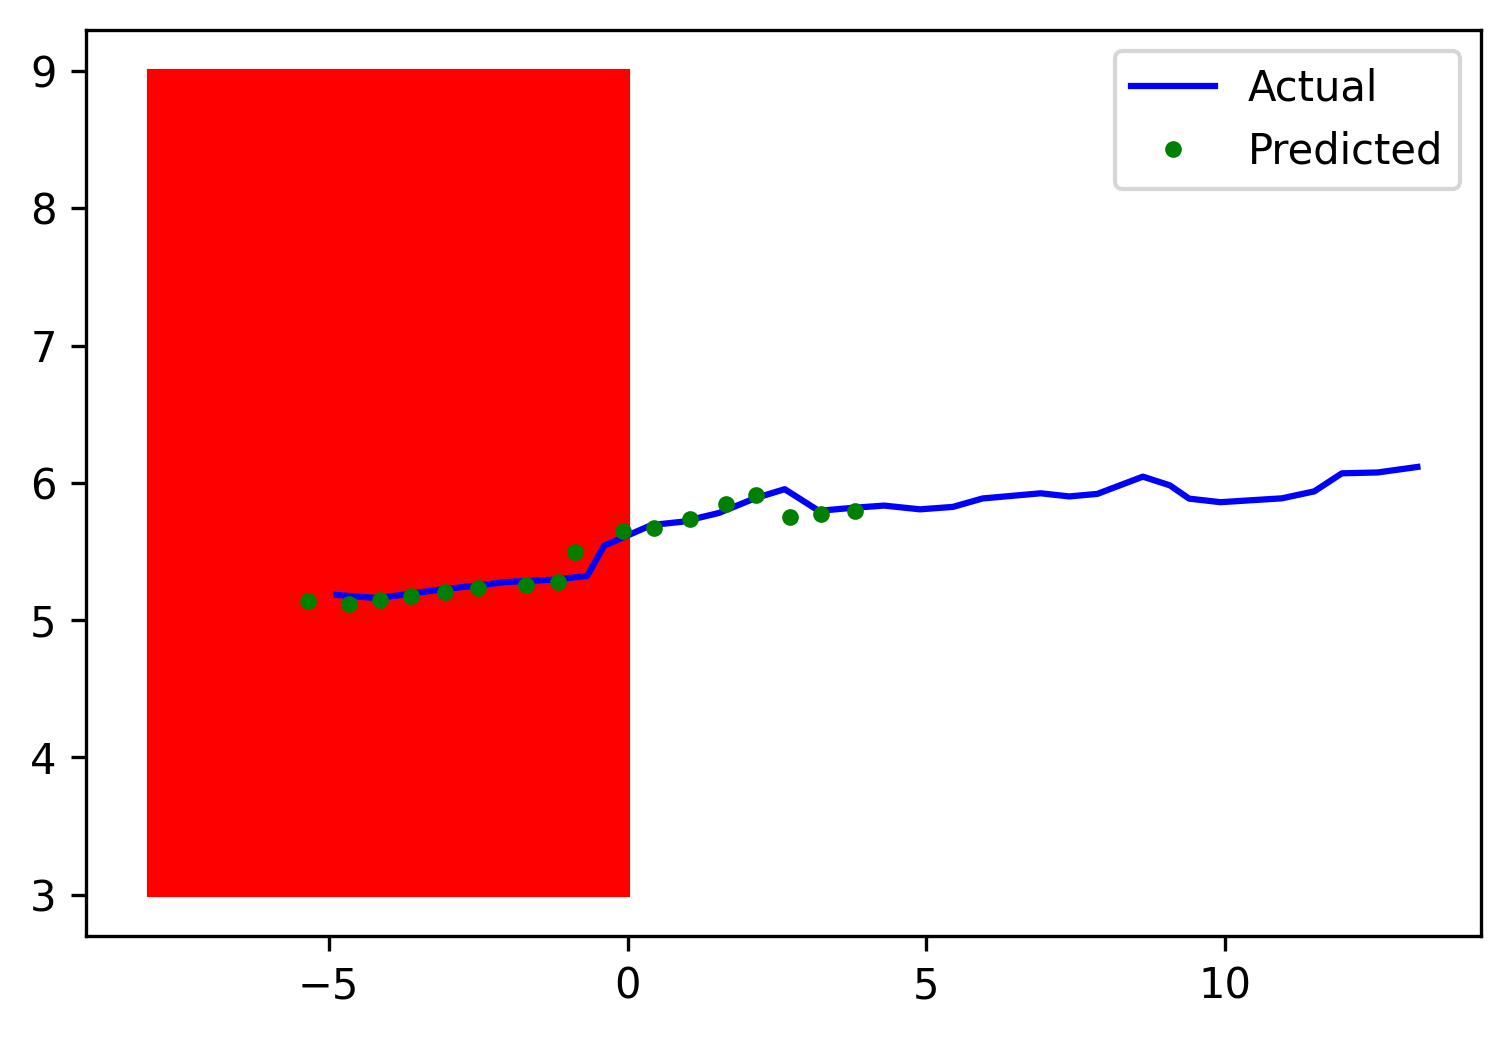

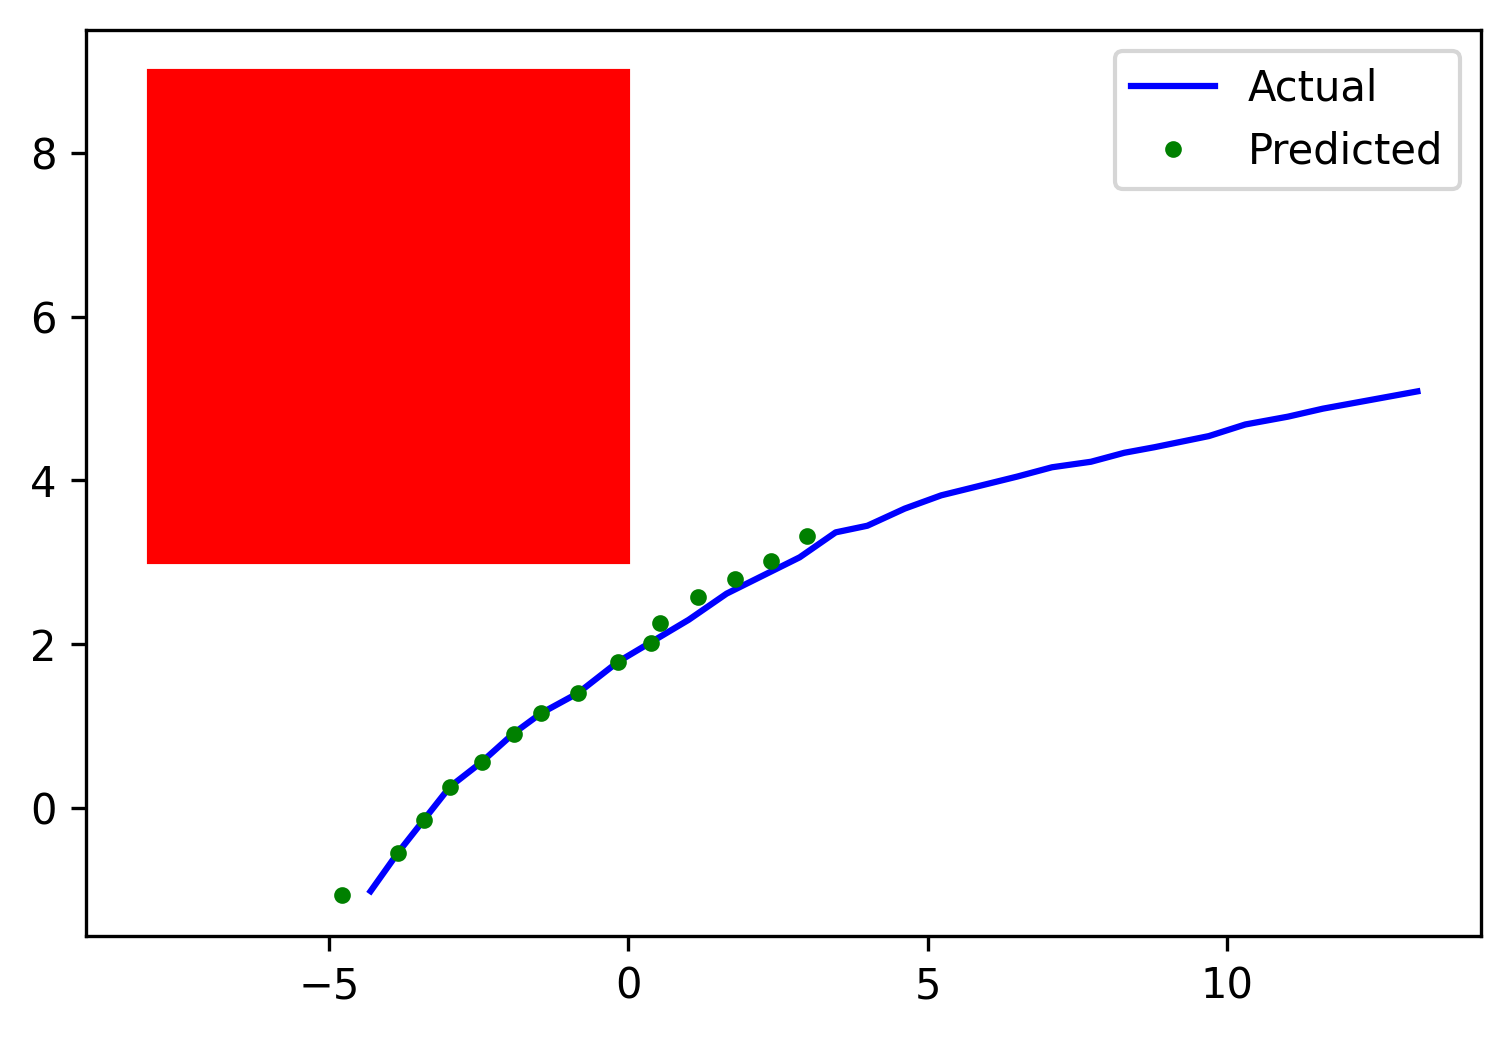

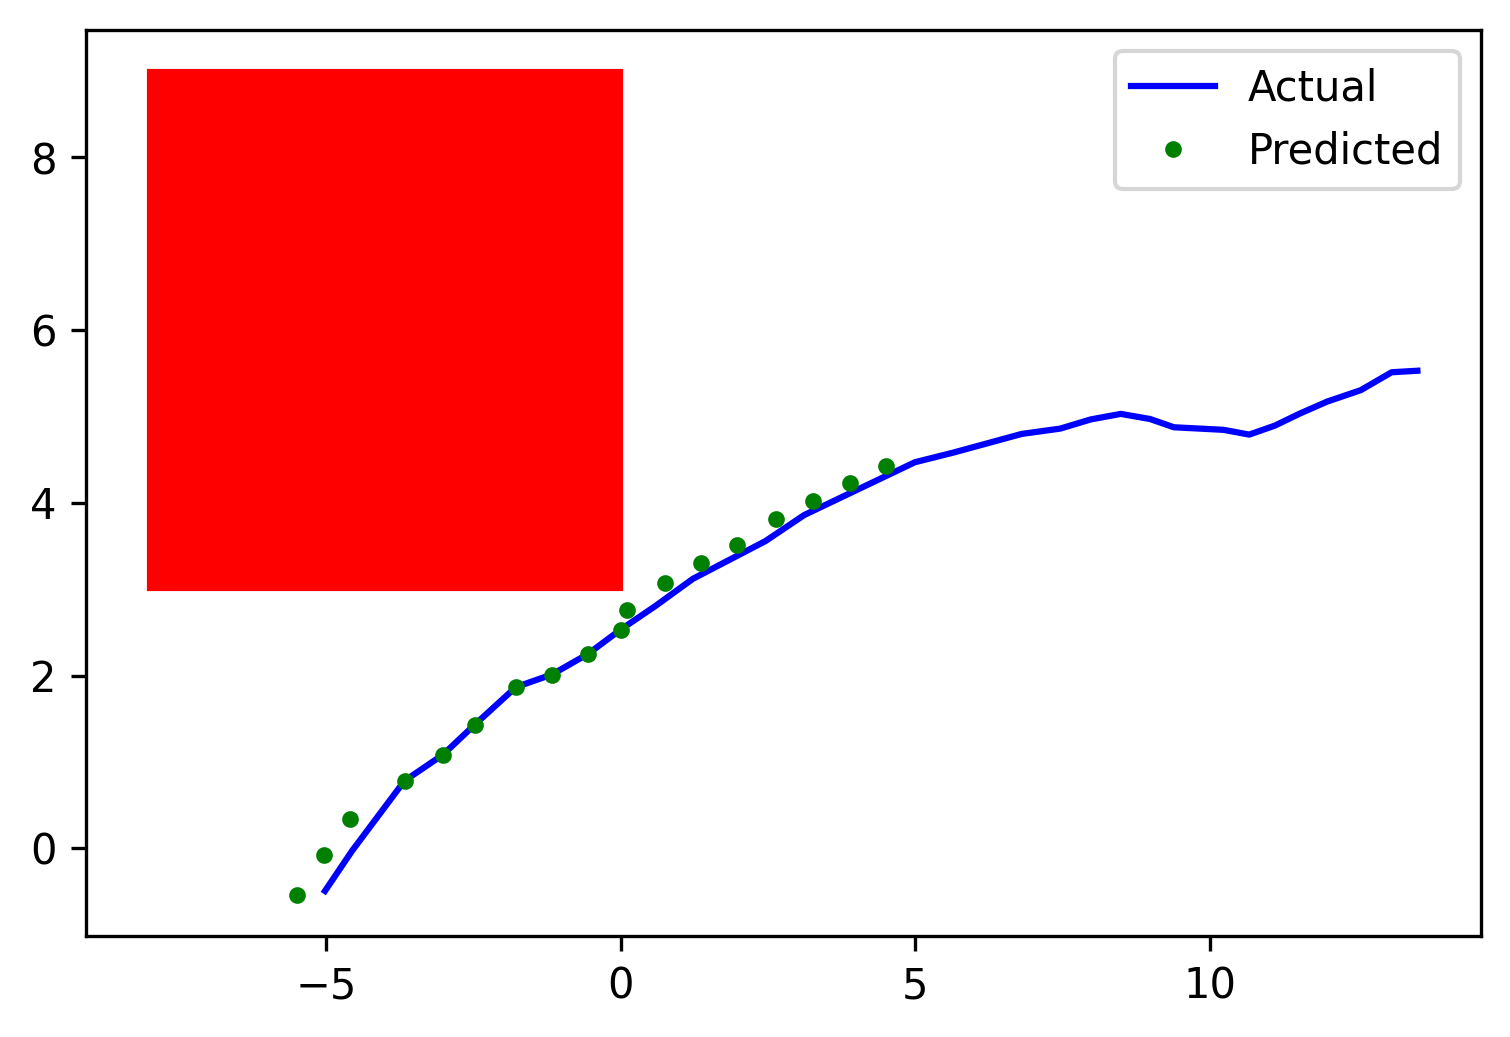

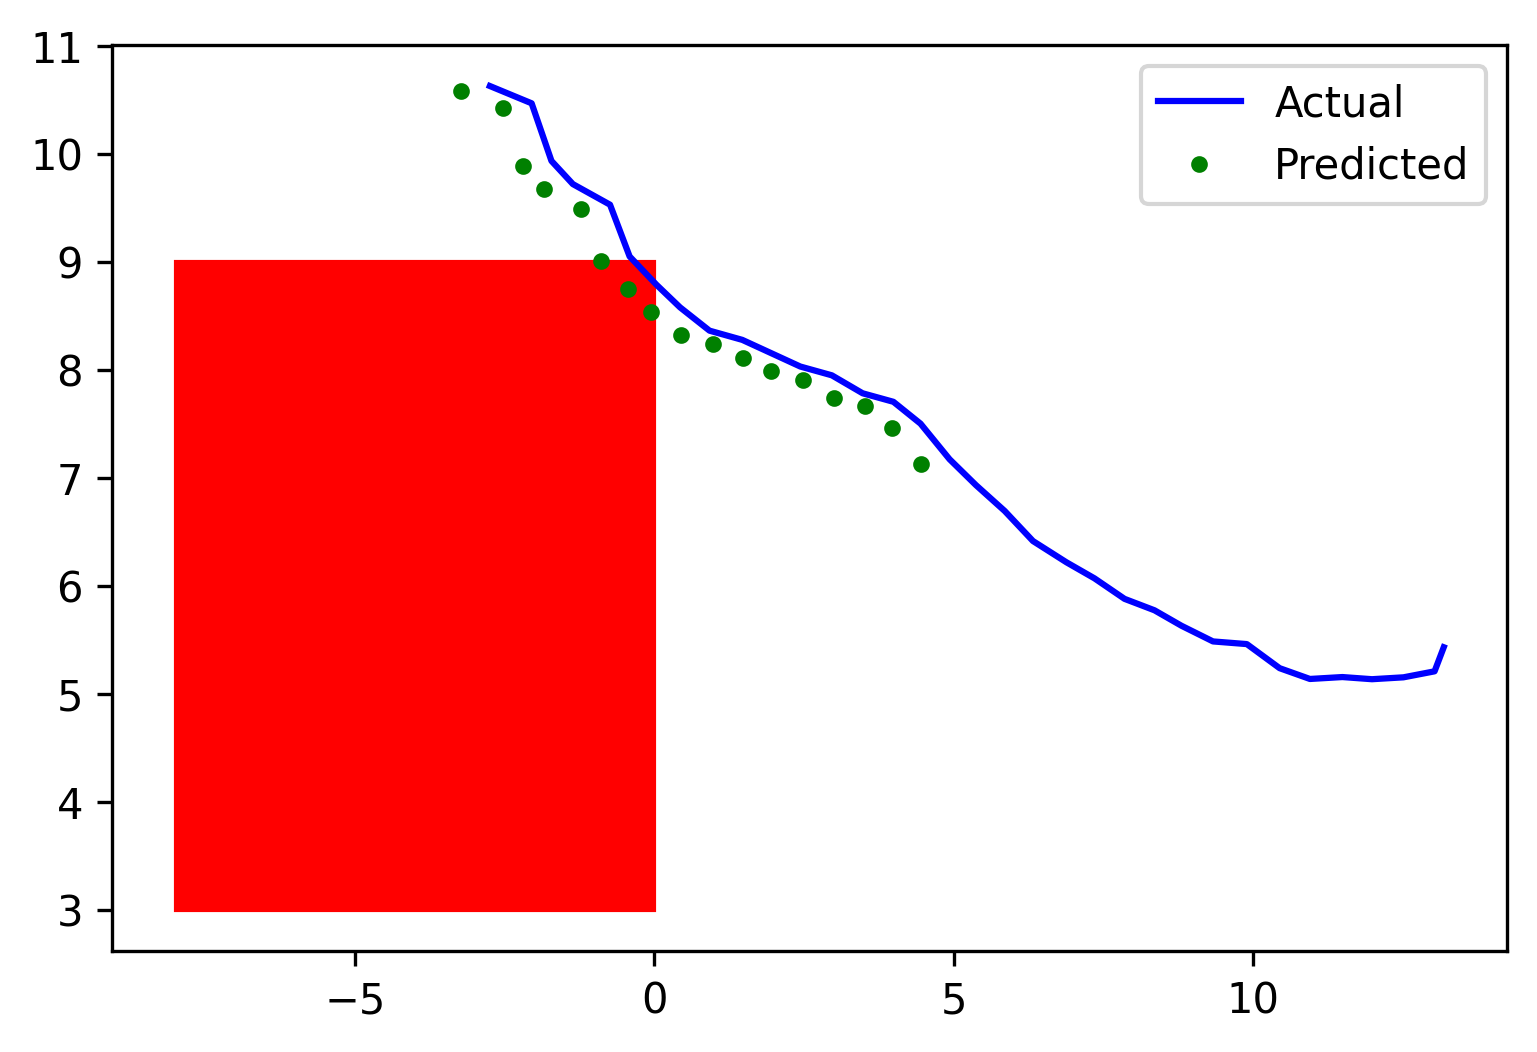

In [359]:
for i in range(50,61):
    user_test = df[df['id'] == i].drop(['id'],1).to_numpy() # extract the 61th user's trajectory
    # data_test = user_test[:int(len(user_test)/2),:] # mask the last half of the trajectory
    L = len(user_test)
    last_point_pos = int(len(user_test)/2)
    last_point = user_test[last_point_pos,:]

    expected_x_and_y = np.dot(model.transmat_, model.means_)
    expected_x_and_y_array = expected_x_and_y
    expected_x_return = expected_x_and_y[0]
    expected_y_return = expected_x_and_y[1]



    predict_list = []
    actual_list = []
    samples_predict = model.predict(user_test[last_point_pos].reshape(1,-1)) # one point at a time

    for i in range(L-last_point_pos):
        # print(samples_predict)
        # test_pos_delta = expected_x_and_y_array[samples_predict, :] + last_point
        test_pos_delta = expected_x_and_y_array[samples_predict, :] + user_test[last_point_pos]
        predict_list.append(test_pos_delta)
        
        samples_predict = model.predict(test_pos_delta.reshape(1,-1)) # one point at a time
        last_point_pos += 1
        last_point = test_pos_delta

    predict_array = np.array(predict_list).reshape(-1, 2)


    # plot figure
    xy = np.array([-8,3])
    fig, ax = plt.subplots(1, 1, dpi=300)
    rect = mpathes.Rectangle(xy,8,6,color='r')

    ax.plot(user_test[:, 0], user_test[:, 1], "b", label="Actual")
    ax.plot(predict_array[:, 0], predict_array[:, 1], "g.", label="Predicted")
    ax.add_patch(rect)

    plt.legend()
    plt.show()

# Plot RMSE Figure

In [355]:
rmse_list = []

for n in range(1,50):
    n_iter = n
    model = GaussianHMM(n_components=4, covariance_type="full", n_iter=n_iter)
    model.fit(samples_train)


    predict_array = []
    true_array = []
    for i in range(50,61):
        user_test = df[df['id'] == i].drop(['id'],1).to_numpy() # extract the 61th user's trajectory
        true_array.append(user_test)
        # data_test = user_test[:int(len(user_test)/2),:] # mask the last half of the trajectory
        # L = len(user_test)
        # last_point_pos = int(len(user_test)/2)
        # last_point = user_test[last_point_pos,:]
        last_point_pos = 0
        expected_x_and_y = np.dot(model.transmat_, model.means_)
        expected_x_and_y_array = expected_x_and_y
        expected_x_return = expected_x_and_y[0]
        expected_y_return = expected_x_and_y[1]


        predict_list = []
        actual_list = []
        samples_predict = model.predict(user_test[last_point_pos].reshape(1,-1)) # one point at a time

        for _ in range(len(user_test)):
            # print(samples_predict)
            # test_pos_delta = expected_x_and_y_array[samples_predict, :] + last_point
            test_pos_delta = expected_x_and_y_array[samples_predict, :] + user_test[last_point_pos]
            predict_list.append(test_pos_delta)
            
            samples_predict = model.predict(test_pos_delta.reshape(1,-1)) # one point at a time
            last_point_pos += 1
            last_point = test_pos_delta

        predict_array.append(np.array(predict_list).reshape(-1, 2))

    # predict_array = np.array(predict_array)
    # true_array = np.array(true_array)

    # calculate rmse
    rmse_sum = 0
    for m in range(len(true_array)):
        rmse_sum += mean_squared_error(true_array[m], predict_array[m])

    rmse = rmse_sum/len(true_array)
    rmse_list.append(rmse)

Text(0, 0.5, 'RMSE')

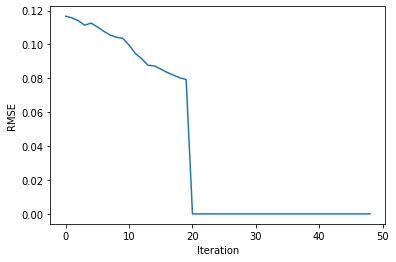

In [356]:
plt.plot(rmse_list)
plt.xlabel("Iteration")
plt.ylabel("RMSE")

# Calculate Precision and AUC

In [391]:
model = GaussianHMM(n_components=4, covariance_type="full", n_iter=10)
model.fit(samples_train)


predict_array = []
true_array = []
for i in range(48,61):
    user_test = df[df['id'] == i].drop(['id'],1).to_numpy() # extract the 61th user's trajectory
    true_array.append(user_test)
    # data_test = user_test[:int(len(user_test)/2),:] # mask the last half of the trajectory
    # L = len(user_test)
    # last_point_pos = int(len(user_test)/2)
    # last_point = user_test[last_point_pos,:]
    last_point_pos = 0
    expected_x_and_y = np.dot(model.transmat_, model.means_)
    expected_x_and_y_array = expected_x_and_y
    expected_x_return = expected_x_and_y[0]
    expected_y_return = expected_x_and_y[1]


    predict_list = []
    actual_list = []
    pred_prob_list = []
    samples_predict = model.predict(user_test[last_point_pos].reshape(1,-1)) # one point at a time

    for _ in range(len(user_test)):
        test_pos_delta = expected_x_and_y_array[samples_predict, :] + user_test[last_point_pos]
        predict_list.append(test_pos_delta)
        
        pred_prob = model.predict_proba(user_test[last_point_pos].reshape(1,-1))[0][samples_predict]
        pred_prob_list.append(pred_prob)
        samples_predict = model.predict(test_pos_delta.reshape(1,-1)) # one point at a time
        last_point_pos += 1
        last_point = test_pos_delta

    predict_array.append(np.array(predict_list).reshape(-1, 2))

In [381]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

pred_label = np.full(len(predict_array), 0)
polygon = Polygon([(-8, 3), (-8, 9), (0, 9), (0, 3)])
for idx, i in enumerate(predict_array):
    for k in i:
        if int(Point(k).within(polygon)):
            pred_label[idx] = 1
            break


label = np.full(len(true_array), 0)
polygon = Polygon([(-8, 3), (-8, 9), (0, 9), (0, 3)])
for idx, i in enumerate(true_array):
    for k in i:
        if int(Point(k).within(polygon)):
            label[idx] = 1
            break

In [396]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(label, pred_label)
metrics.auc(fpr, tpr)

0.9285714285714286

In [385]:
metrics.precision_score(label, pred_label)

0.8571428571428571

In [393]:
metrics.accuracy_score(label, pred_label)

0.9230769230769231